In [2]:
import numpy as np
import matplotlib.pyplot as plt
import zarr #apply %conda install zarr if needed
import xarray as xr

In [4]:
# Open zarr 'file'. Data is not loaded yet. Make sure to limit the 
# open archive from online storage
base_url="https://nx7384.your-storageshare.de/apps/sharingpath/wetwin/public/emodnet2022"
lat_url=f"{base_url}/lat.zarr"
lat_file=xr.open_zarr(lat_url,consolidated=True) # Lowest astronomical tide
hat_url=f"{base_url}/hat.zarr"
hat_file=xr.open_zarr("zarr_output_2022/hat.zarr",consolidated=True) # Highest astronomical tide
depth_url=f"{base_url}/depth_msl.zarr"
depth_file=xr.open_zarr("zarr_output_2022/depth_msl.zarr",consolidated=True) # Depth relative to MSL
#open archive when available on local storage
# lat_file=xr.open_zarr("zarr_output_2022/lat.zarr",consolidated=True) # Lowest astromoical tide
# hat_file=xr.open_zarr("zarr_output_2022/hat.zarr",consolidated=True) # Highest astronomical tide
# depth_file=xr.open_zarr("zarr_output_2022/depth_msl.zarr",consolidated=True) # Depth relative to MSL
lat_file

<xarray.Dataset>
Dimensions:         (lat: 72009, lon: 75854)
Coordinates:
  * lat             (lat) float64 15.0 15.0 15.0 15.0 ... 90.0 90.0 90.0 90.0
  * lon             (lon) float64 -36.0 -36.0 -36.0 -36.0 ... 43.0 43.0 43.0
Data variables:
    lat_correction  (lat, lon) float32 ...
Attributes:
    release:      2022
    history:      Created by convert_to_zarr.jl
    source:       EMODnet
    title:        Lowest Astronomical Tide (LAT) for EMODnet tiles
    description:  Lowest Astronomical Tide (LAT) for EMODnet tiles

In [5]:
# compute range of latitudes and longitudes
lat_range = lat_file['lat'].values
lon_range = lat_file['lon'].values
lon_min = lon_range.min()
lon_max = lon_range.max()
lat_min = lat_range.min()
lat_max = lat_range.max()
print('lat range:',lat_min,lat_max)
print('lon range:',lon_min,lon_max)
print('lat size:',lat_range.shape)
print('lon size:',lon_range.shape)
# There are about 5.45 billion points in each of the three files

lat range: 15.000520833333335 89.99947916666667
lon range: -35.99947916666667 42.99947916666667
lat size: (72009,)
lon size: (75854,)


In [11]:
# NOTE: You almost always want to select a subset of the data, since the data is too large to load all at once
# This is the entire region
# lon_min = -36.0 #western border
# lon_max = 43.0 #eastern border
# lat_min = 15.0 #southern border
# lat_max = 89.9 #northern border 
# example for Northern Adriatic
lon_min = 12.0 #western border
lon_max = 17.0 #eastern border
lat_min = 42.0 #southern border
lat_max = 46.0 #northern border 


lat_correction = lat_file['lat_correction'].sel(lon=slice(lon_min, lon_max),lat=slice(lat_min, lat_max))
hat_correction = hat_file['hat_correction'].sel(lon=slice(lon_min, lon_max),lat=slice(lat_min, lat_max))
depth_msl = depth_file['depth_msl'].sel(lon=slice(lon_min, lon_max),lat=slice(lat_min, lat_max))
x=lat_file['lon'].sel(lon=slice(lon_min, lon_max)).values
y=lat_file['lat'].sel(lat=slice(lat_min, lat_max)).values
#lat_correction = zfile['lat_correction'] # select all data anyway
lat_correction

<xarray.DataArray 'lat_correction' (lat: 3841, lon: 4800)>
[18436800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 42.0 42.0 42.0 42.0 42.0 ... 46.0 46.0 46.0 46.0 46.0
  * lon      (lon) float64 12.0 12.0 12.0 12.0 12.0 ... 17.0 17.0 17.0 17.0 17.0
Attributes:
    units:          m
    long_name:      Lowest Astronomical Tide
    standard_name:  height_above_mean_sea_level

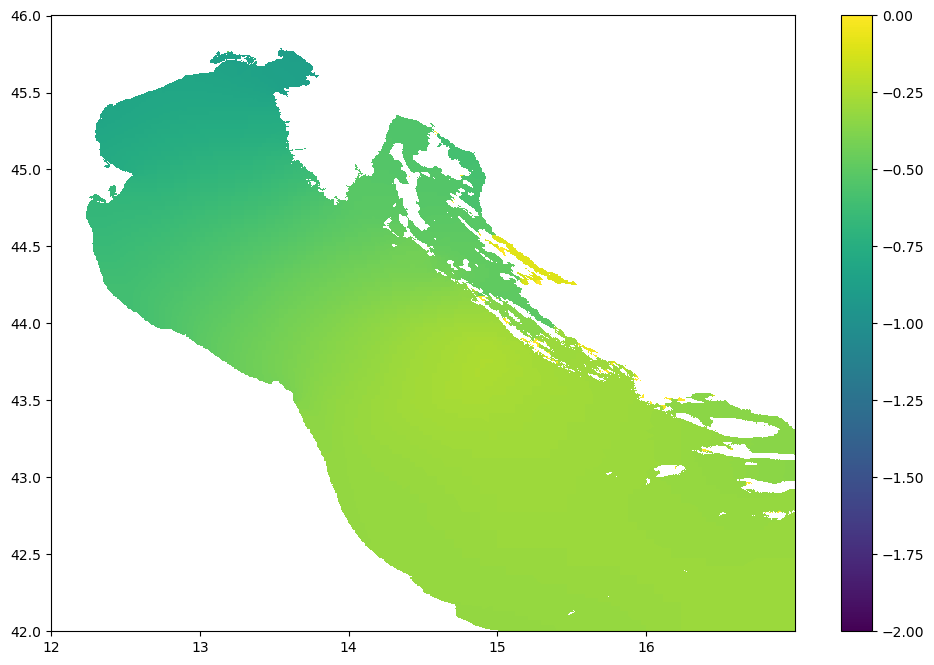

In [16]:
# plot LAT
skip=5 # do not select more than a thousand points in eacht direction
x_skip=x[::skip]
y_skip=y[::skip]
lat_correction_skip=lat_correction[::skip,::skip]
plt.figure(figsize=(12,8),dpi=100)
#plot data
plt.pcolormesh(x_skip,y_skip,lat_correction_skip,cmap='viridis',vmin=-2.0,vmax=0.0)
plt.colorbar()

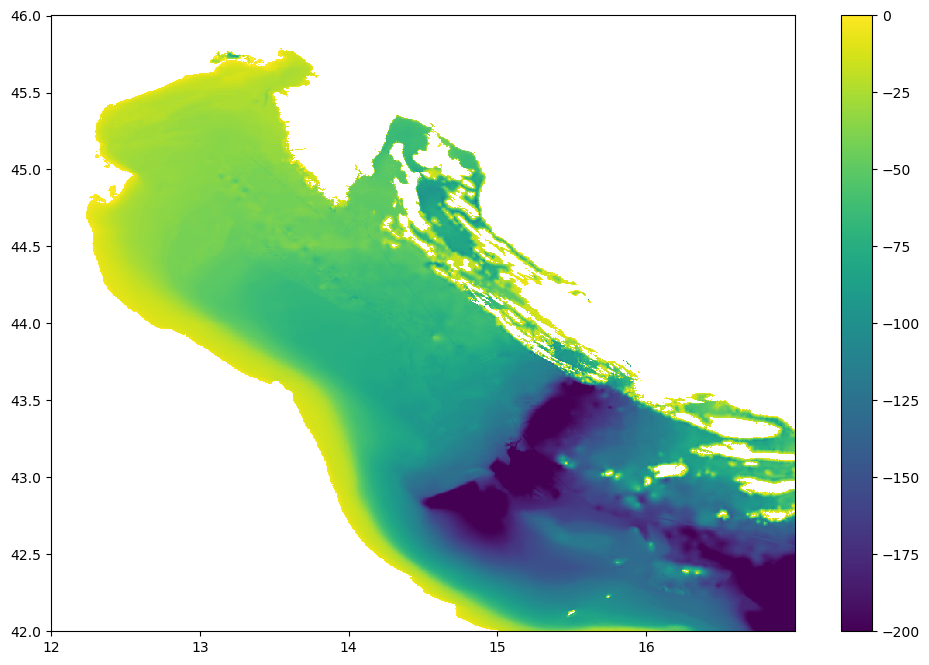

In [15]:
# plot depth
skip=5 # do not select more than a thousand points in eacht direction
x_skip=x[::skip]
y_skip=y[::skip]
depth_msl_skip=depth_msl[::skip,::skip]
plt.figure(figsize=(12,8),dpi=100)
#plot data
plt.pcolormesh(x_skip,y_skip,depth_msl_skip,cmap='viridis',vmin=-200.0,vmax=0.0)
plt.colorbar()